# Fractionation
In this chapter, we will see how to use MOAI to calculate the fractionation of chemical element during magma ocean solidification. This has plenty of applications in planetary science, like calculating outgassing of volatiles, enrichement in heat-producing elements, or alteration of isotopic systems, used to date the fractionation event.

## Instantaneous fractionation

First, we need a MO:

In [1]:
from MO_lib.eq_basic import MO
MO.updateT_pot(3000)

No file found: calculating lookups, be patient it can take some time!


Let's look at the fractionation of a reference incompatible element: the Moaium (Mo):

In [2]:
from chemistry.elements import Mo
Mo.part_coef = 0.1 # Moaium is pretty incompatible

# Let's add some Moaium in our MO
MO.addSpecies([Mo],             # which element / molecule are we adding
              [0.1],            # bulk content to add to the system [kg/kg]
              volatile=False,   # is it a volatile element?
              reg_elems=False)  # if we were adding a molecule, do we want to track its constituent elements individually?

# Do the fractionation
MO.fractionation(['Mo'])

print('Mo concentration in the liquid:', MO.content['liquid']['Mo'],', Mo concentration in the crystals:',MO.content['solid']['Mo'])

Mo concentration in the liquid: 0.1 , Mo concentration in the crystals: 0.010000000000000002


## Fractionation and crystllization
Let's now track the composition of the MO as it crystallizes

In [3]:
from tools import MO_time_series
ts = MO_time_series(MO)
ts.write(0)

# By adding Mo to the 'to_frac' list, we tell the MO to calculate its fractionation each time its state is updated
MO.to_frac = ['Mo']

while MO.p_bot > 1e9:
    MO.updateT_pot(MO.adiabat.T_pot-1) # we let the MO crystallize by decreasing its potential temperature by steps of 1 K
    ts.write(0)                        # time doesn't matter, we will use some other variable to plot the time-series

Let's see how it looks like

Text(0, 0.5, 'Mo concentration in the MO [kg/kg]')

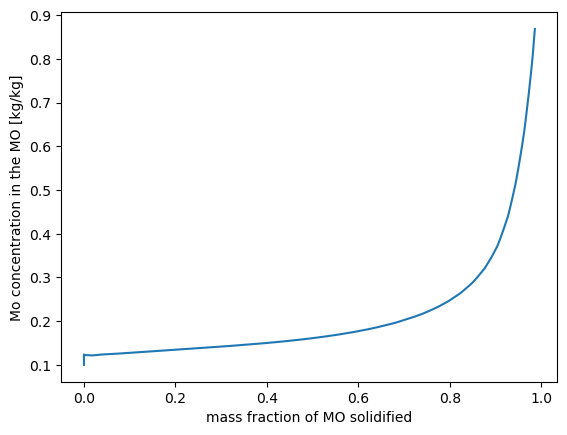

In [4]:
import matplotlib.pyplot as plt
ts.Mplot(['Mo_liquid'])
plt.xlabel('mass fraction of MO solidified')
plt.ylabel('Mo concentration in the MO [kg/kg]')

This is the typical evolution for an incompatible element. The step at the beginning is due to the fact that fractionation alters the liquid content as soon as crystals form, while the mass of the solid-like domain only starts to decrease when the bottom cools to the RCMF in this case.    
We can also plot the profile the Mo content in the MO cumulates. Because the cumulates retain some trapped melt, their content is due to both the content of the crystals and the content of the melt. This is important to consider for incompatible elements, for which the trapped melt can represent an important part of the cumulates budget.

Text(0, 0.5, 'pressure [GPa]')

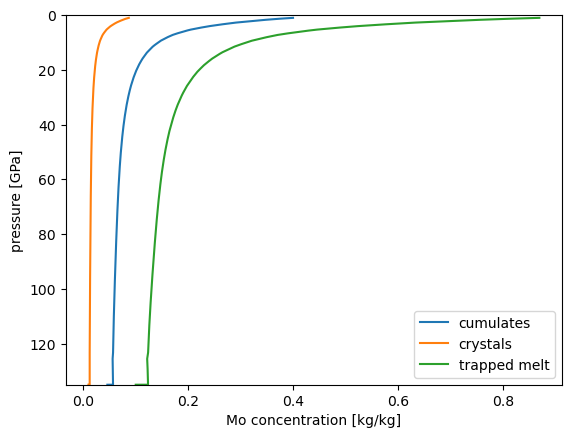

In [5]:
plt.plot(MO.mc.RCMF*ts('Mo_liquid')+(1-MO.mc.RCMF)*ts('Mo_solid'),ts('p_bot')*1e-9,label='cumulates')
plt.plot(ts('Mo_solid'),ts('p_bot')*1e-9,label='crystals')
plt.plot(ts('Mo_liquid'),ts('p_bot')*1e-9,label='trapped melt')
plt.ylim(135,0)
plt.legend()
plt.xlabel('Mo concentration [kg/kg]')
plt.ylabel('pressure [GPa]')